In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [2]:
df = pd.read_csv("Nhom19_final_data.csv")

In [3]:
df = df.drop(columns=[df.columns[0]])

In [5]:
df.head(10)

,Địa chỉ,Mức giá,Giá/m²,Số phòng ngủ,Huyện,Diện tích (m2),Số toilet,Nội thất,Latitude,Longitude,Đường
0,"Dự án Eco Green Sài Gòn, Đường Nguyễn Văn Linh...",4200.0,63.64,2,Quận 7,66.0,2,Cơ bản,10.750351,106.723175,Nguyễn Văn Linh
1,"Dự án Lumiere Riverside, Đường Võ Nguyên Giáp,...",6150.0,118.27,1,Quận 2,52.0,1,Cơ bản nội thất cơ bản gồm: Hệ thống máy lạnh ...,10.804214,106.749519,Võ Nguyên Giáp
2,"Celadon City, N1, Sơn Kỳ, Tân Phú, Hồ Chí Minh",4500.0,52.94,2,Tân Phú,85.0,2,Đầy đủ,10.803500,106.616515,N1
3,"Dự án Lumiere Riverside, Đường Xa Lộ Hà Nội, P...",14400.0,142.57,3,Quận 2,101.0,2,Cơ bản.,10.804214,106.749519,Xa Lộ Hà Nội
4,"Dự án Diamond Brilliant, Đường N1, Phường Sơn ...",5900.0,61.46,2,Tân Phú,96.0,2,Cơ bản.,10.803988,106.617371,N1
5,"Dự án Căn hộ Precia Quận 2, Đường Nguyễn Thị Đ...",4150.0,61.76,2,Quận 2,67.2,2,Đầy đủ,10.791280,106.755028,Nguyễn Thị Định
6,"Dự án Diamond Centery Celadon City, Đường N1, ...",7340.0,60.65,3,Tân Phú,121.0,3,Cơ bản,10.803988,106.617371,N1
7,"Dự án Diamond Centery Celadon City, Đường N1, ...",7380.0,61.01,3,Tân Phú,121.0,3,Cơ bản,10.803988,106.617371,N1
8,"Vinhomes Golden River Ba Son, Số 2, Phố Tôn Đứ...",9200.0,116.02,2,Quận 1,79.3,2,Đầy đủ,10.784106,106.703650,Nguyễn Văn Hưởng
9,"Diamond Centery Celadon City, Đường N1, Phường...",10590.0,65.97,4,Tân Phú,160.5,3,Đầy đủ,10.803988,106.617370,N1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12550 entries, 0 to 12549
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Địa chỉ         12550 non-null  object 
 1   Mức giá         12550 non-null  float64
 2   Giá/m²          12550 non-null  float64
 3   Số phòng ngủ    12550 non-null  int64  
 4   Huyện           12550 non-null  object 
 5   Diện tích (m2)  12550 non-null  float64
 6   Số toilet       12550 non-null  int64  
 7   Nội thất        12550 non-null  object 
 8   Latitude        12550 non-null  float64
 9   Longitude       12550 non-null  float64
 10  Đường           12550 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


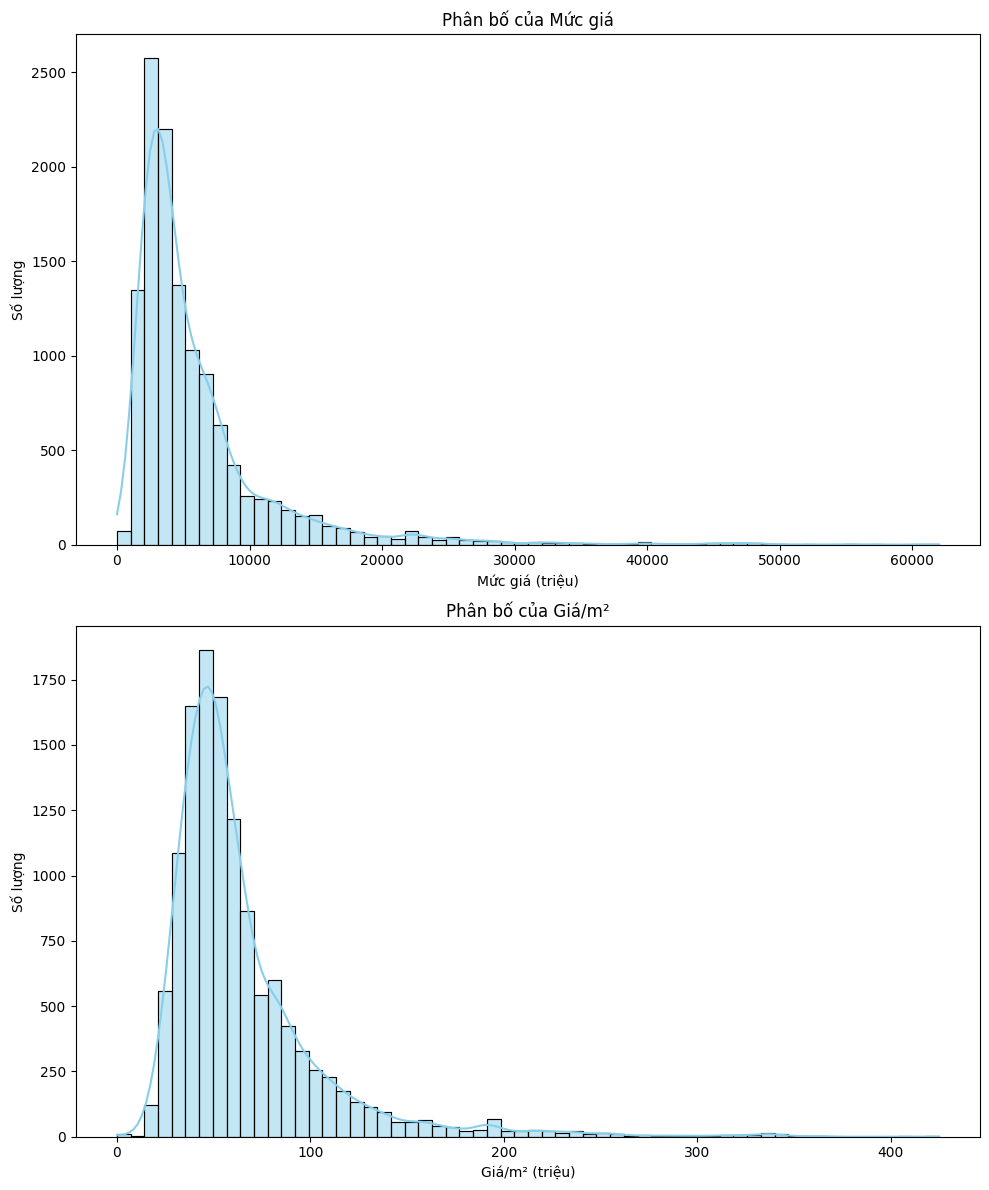

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  

sns.histplot(df["Mức giá"], kde=True, bins=60, color="skyblue", ax=axes[0])
axes[0].set_title("Phân bố của Mức giá")
axes[0].set_xlabel("Mức giá (triệu)")
axes[0].set_ylabel("Số lượng")

sns.histplot(df["Giá/m²"], kde=True, bins=60, color="skyblue", ax=axes[1])
axes[1].set_title("Phân bố của Giá/m²")
axes[1].set_xlabel("Giá/m² (triệu)")
axes[1].set_ylabel("Số lượng")

plt.tight_layout()
plt.show()

Số lượng chung cư theo quận

C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\1876905272.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_district.values, y=avg_price_by_district.index, palette="viridis", ax=axes[1])


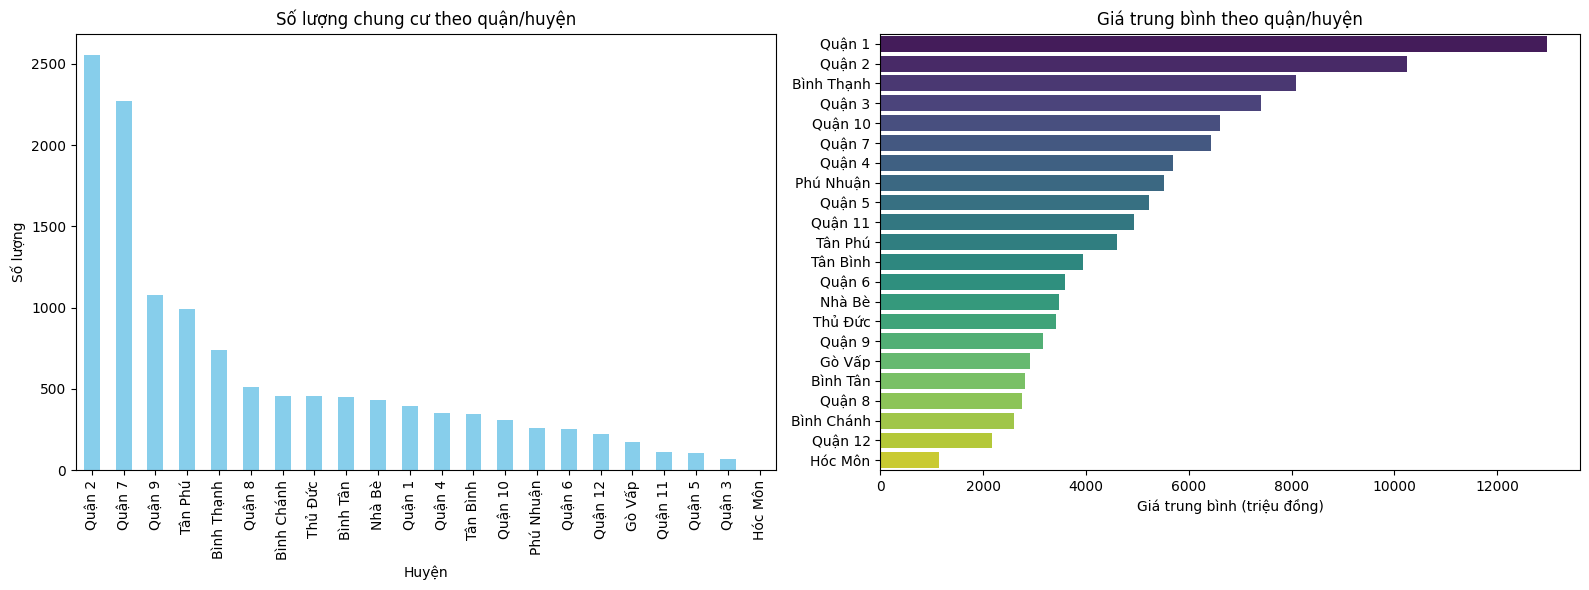

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df['Huyện'].value_counts().plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Số lượng chung cư theo quận/huyện')
axes[0].set_xlabel('Huyện')
axes[0].set_ylabel('Số lượng')

avg_price_by_district = df.groupby('Huyện')['Mức giá'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_district.values, y=avg_price_by_district.index, palette="viridis", ax=axes[1])
axes[1].set_title('Giá trung bình theo quận/huyện')
axes[1].set_xlabel('Giá trung bình (triệu đồng)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\1770196652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Huyện", y="Mức giá", data=df, palette="Set2", ax=axes[0], order=district_order_price)
C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\1770196652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Huyện", y="Giá/m²", data=df, palette="Set2", ax=axes[1], order=district_order_price_per_sqm)


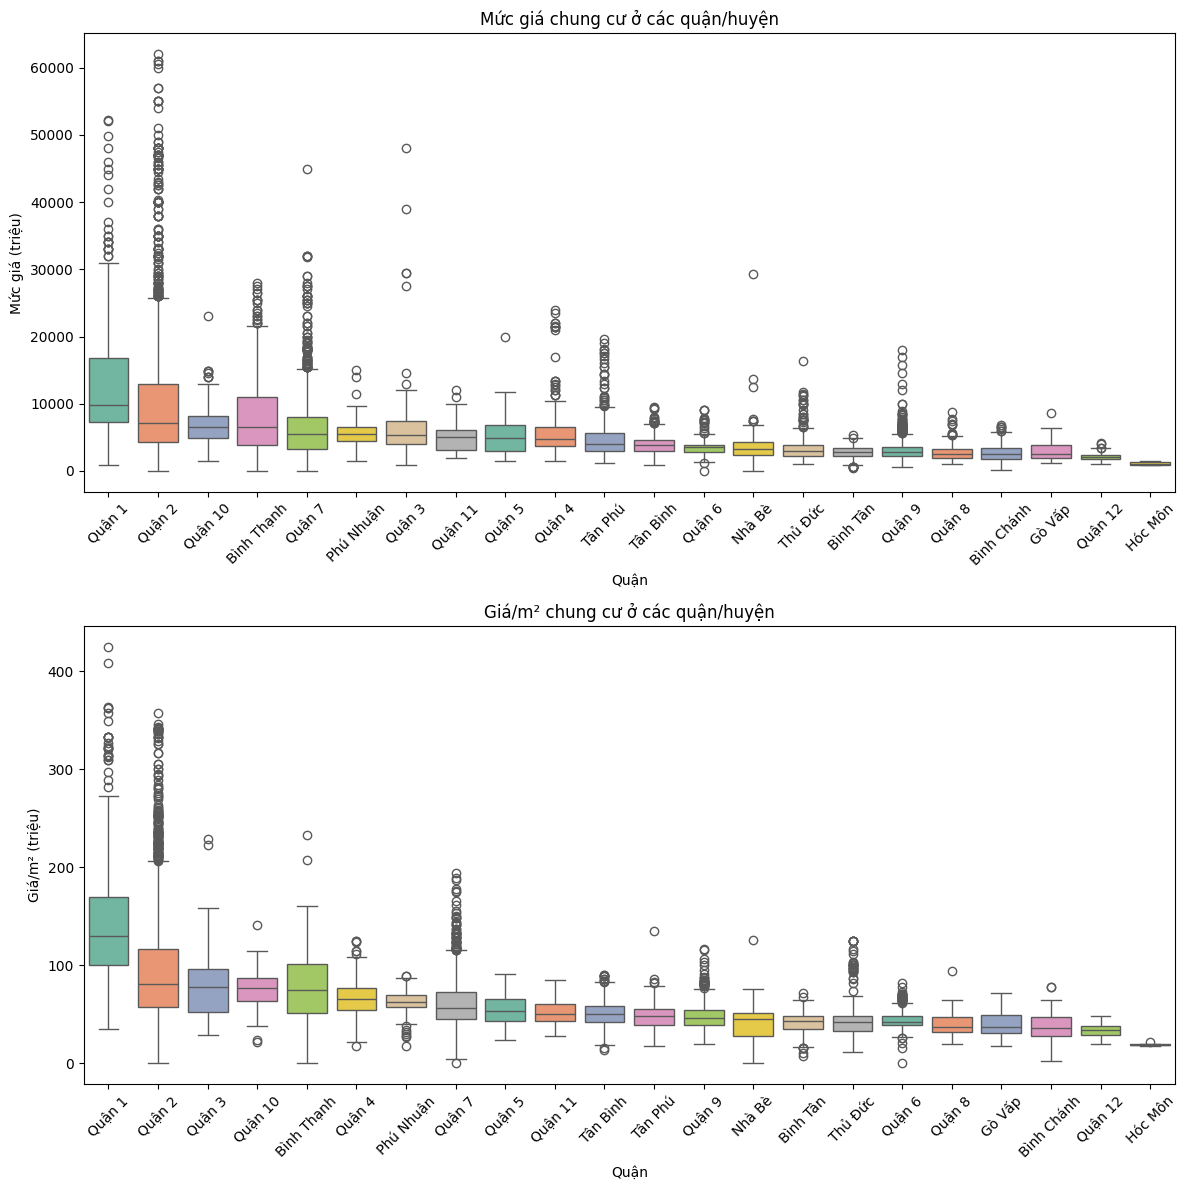

In [9]:
district_order_price = df.groupby("Huyện")["Mức giá"].median().sort_values(ascending=False).index

district_order_price_per_sqm = df.groupby("Huyện")["Giá/m²"].median().sort_values(ascending=False).index

fig, axes = plt.subplots(2, 1, figsize=(12, 12))  

sns.boxplot(x="Huyện", y="Mức giá", data=df, palette="Set2", ax=axes[0], order=district_order_price)
axes[0].set_title("Mức giá chung cư ở các quận/huyện")
axes[0].set_xlabel("Quận")
axes[0].set_ylabel("Mức giá (triệu)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x="Huyện", y="Giá/m²", data=df, palette="Set2", ax=axes[1], order=district_order_price_per_sqm)
axes[1].set_title("Giá/m² chung cư ở các quận/huyện")
axes[1].set_xlabel("Quận")
axes[1].set_ylabel("Giá/m² (triệu)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\1430165497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_count_by_street.values, y=property_count_by_street.index, palette='viridis', ax=axes[0])
C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\1430165497.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_street.values, y=avg_price_by_street.index, palette='plasma', ax=axes[1])


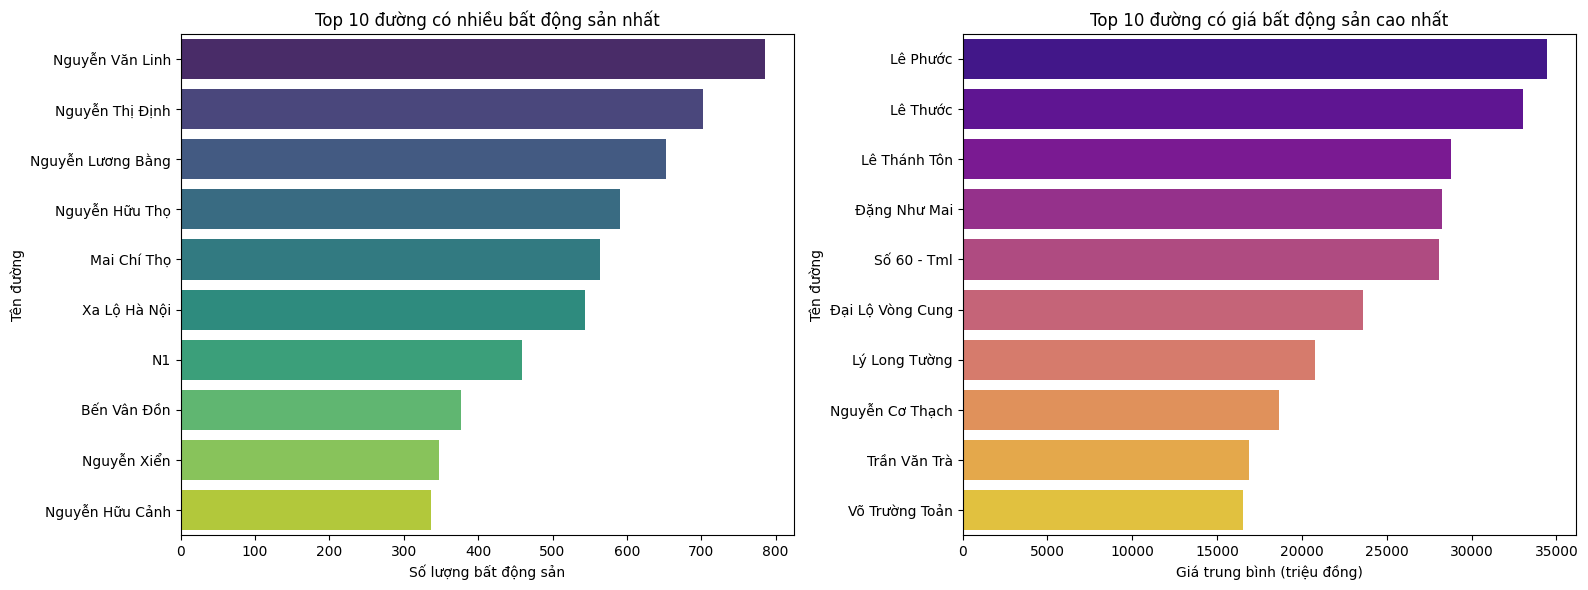

In [10]:
property_count_by_street = df['Đường'].value_counts().head(10)

avg_price_by_street = df.groupby('Đường')['Mức giá'].mean().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

sns.barplot(x=property_count_by_street.values, y=property_count_by_street.index, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 đường có nhiều bất động sản nhất')
axes[0].set_xlabel('Số lượng bất động sản')
axes[0].set_ylabel('Tên đường')

sns.barplot(x=avg_price_by_street.values, y=avg_price_by_street.index, palette='plasma', ax=axes[1])
axes[1].set_title('Top 10 đường có giá bất động sản cao nhất')
axes[1].set_xlabel('Giá trung bình (triệu đồng)')
axes[1].set_ylabel('Tên đường')

plt.tight_layout()
plt.show()

C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\4146696088.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Đường",y="Mức giá",data=df_top_roads,palette="Set3",order=sorted_roads_price,ax=axes[0])
C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\4146696088.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Đường",y="Giá/m²",data=df_top_roads,palette="Set2",order=sorted_roads_price_per_m2,ax=axes[1])


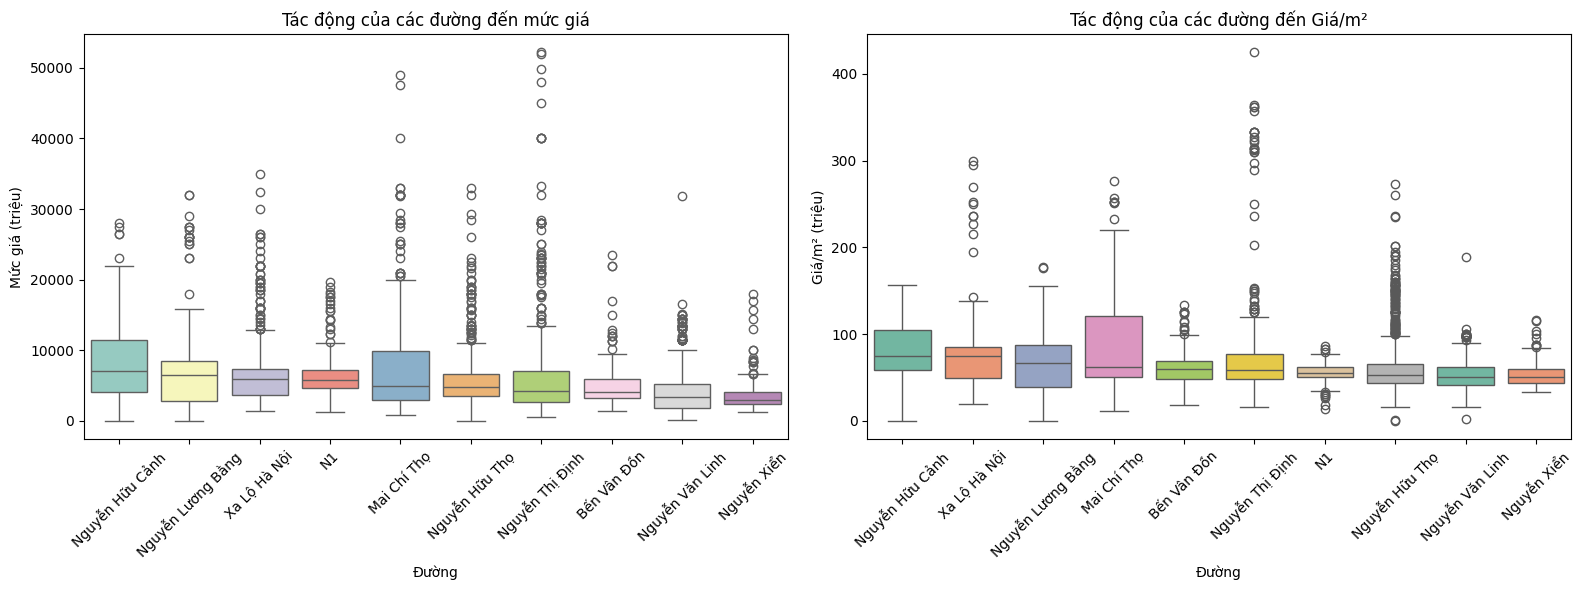

In [11]:
top_10_roads = df["Đường"].value_counts().head(10).index
df_top_roads = df[df["Đường"].isin(top_10_roads)]

median_price = df_top_roads.groupby("Đường")["Mức giá"].median().sort_values(ascending=False)
sorted_roads_price = median_price.index

median_price_per_m2 = df_top_roads.groupby("Đường")["Giá/m²"].median().sort_values(ascending=False)
sorted_roads_price_per_m2 = median_price_per_m2.index

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x="Đường",y="Mức giá",data=df_top_roads,palette="Set3",order=sorted_roads_price,ax=axes[0])
axes[0].set_title("Tác động của các đường đến mức giá")
axes[0].set_xlabel("Đường")
axes[0].set_ylabel("Mức giá (triệu)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x="Đường",y="Giá/m²",data=df_top_roads,palette="Set2",order=sorted_roads_price_per_m2,ax=axes[1])
axes[1].set_title("Tác động của các đường đến Giá/m²")
axes[1].set_xlabel("Đường")
axes[1].set_ylabel("Giá/m² (triệu)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

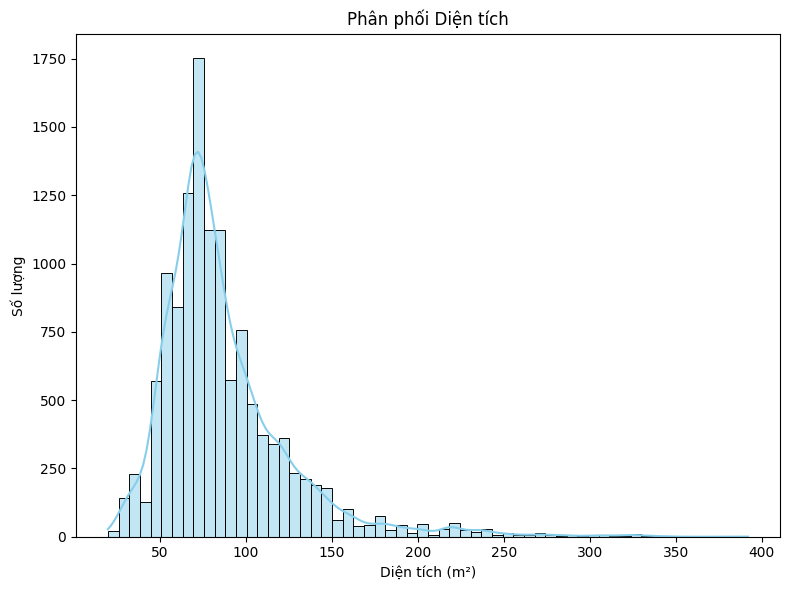

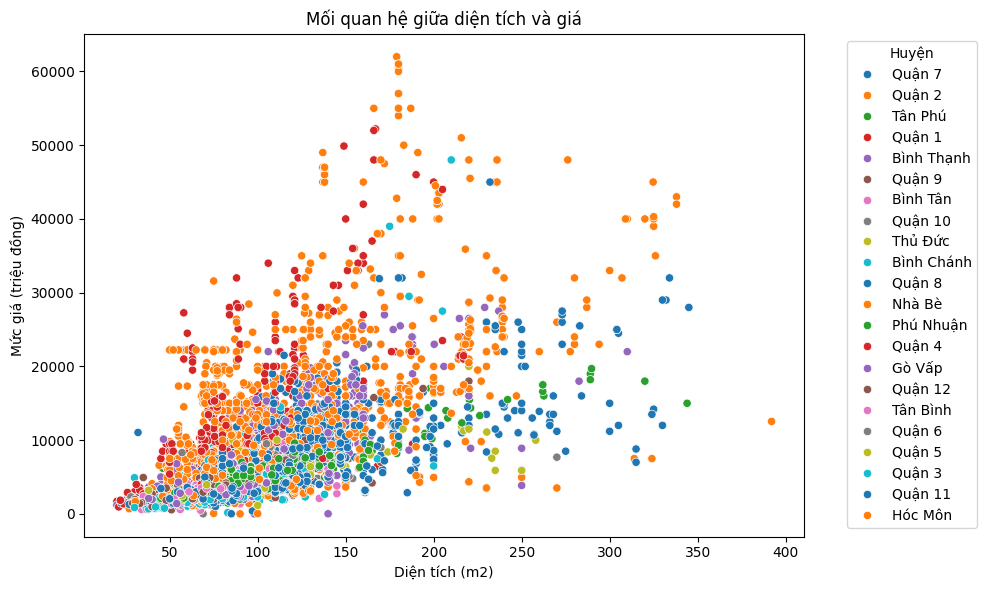

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Diện tích (m2)"], kde=True, bins=60, color="skyblue")
plt.title("Phân phối Diện tích")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diện tích (m2)', y='Mức giá', hue='Huyện', data=df, palette='tab10')
plt.title('Mối quan hệ giữa diện tích và giá')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Mức giá (triệu đồng)')
plt.legend(title='Huyện', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


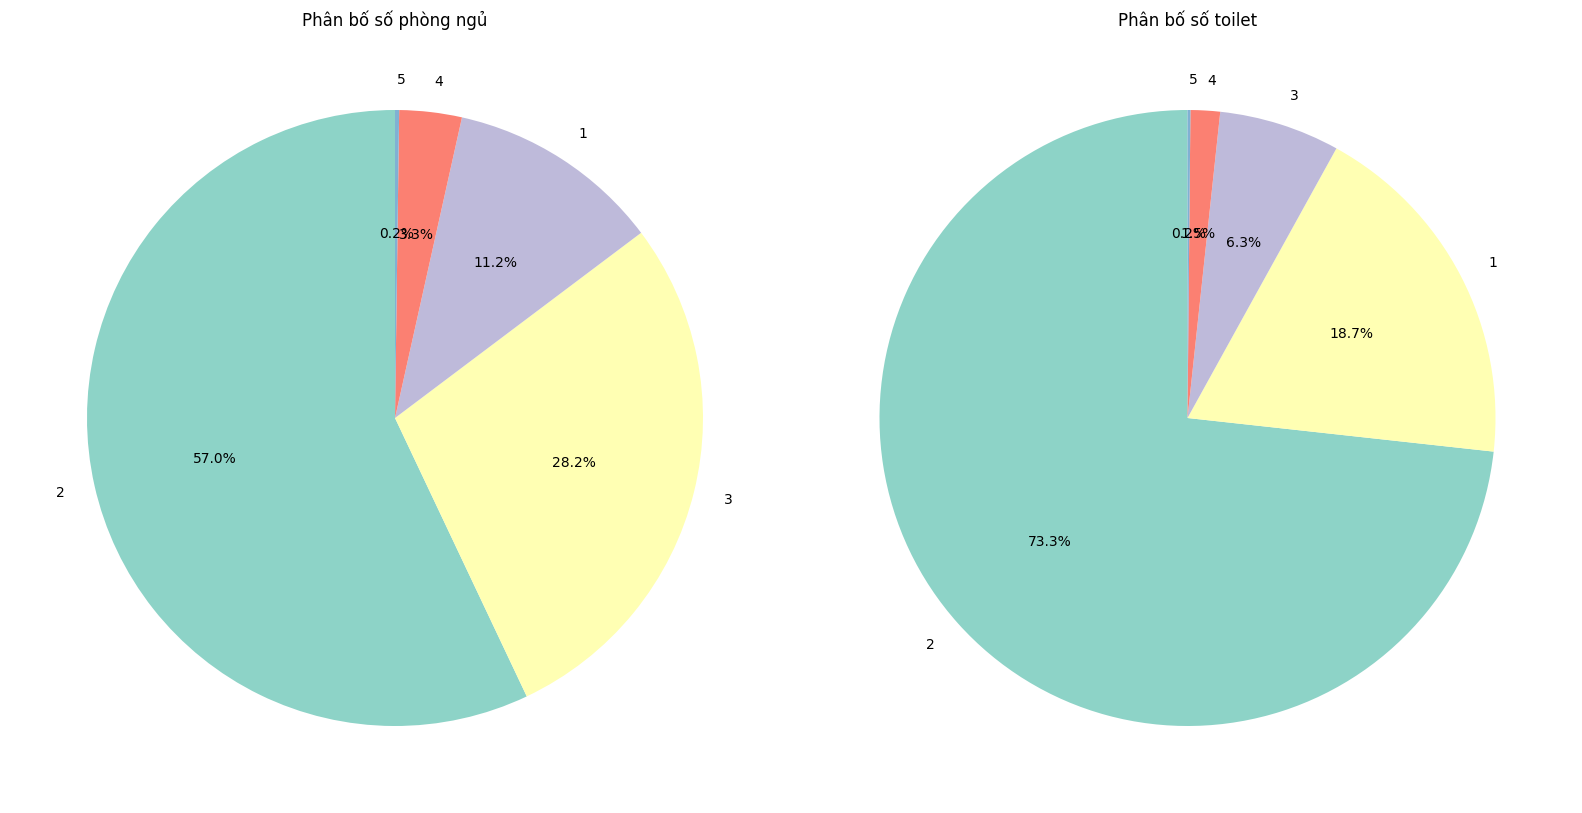

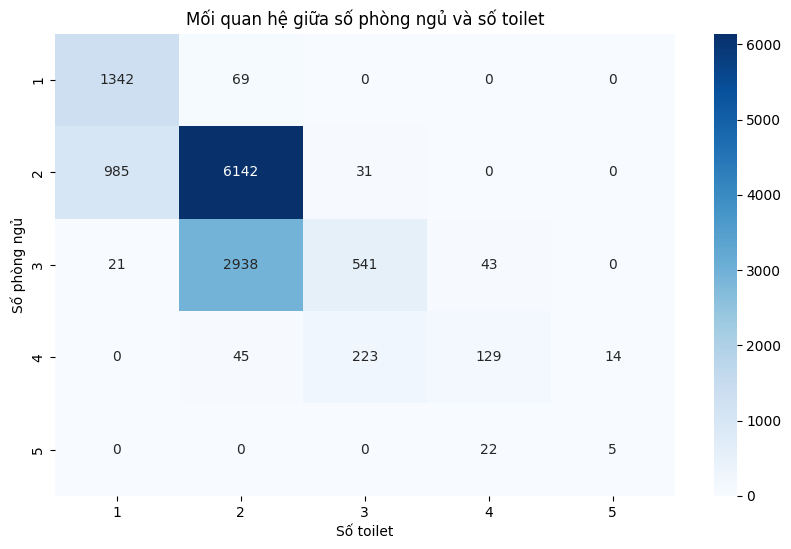

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

bedroom_counts = df['Số phòng ngủ'].value_counts()
axes[0].pie(bedroom_counts,labels=bedroom_counts.index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set3',len(bedroom_counts)))
axes[0].set_title('Phân bố số phòng ngủ')

toilet_counts = df['Số toilet'].value_counts()
axes[1].pie(toilet_counts,labels=toilet_counts.index,autopct='%1.1f%%',startangle=90, colors=sns.color_palette('Set3', len(toilet_counts)))
axes[1].set_title('Phân bố số toilet')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

heatmap_data = df.groupby(['Số phòng ngủ', 'Số toilet']).size().unstack().fillna(0).astype(int)

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Mối quan hệ giữa số phòng ngủ và số toilet')
plt.xlabel('Số toilet')
plt.ylabel('Số phòng ngủ')
plt.show()

C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\116638068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Số phòng ngủ', y='Mức giá', palette='Set2', ax=axes[0])
C:\Users\PhongVu\AppData\Local\Temp\ipykernel_22468\116638068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Số toilet', y='Mức giá', palette='Set3', ax=axes[1])


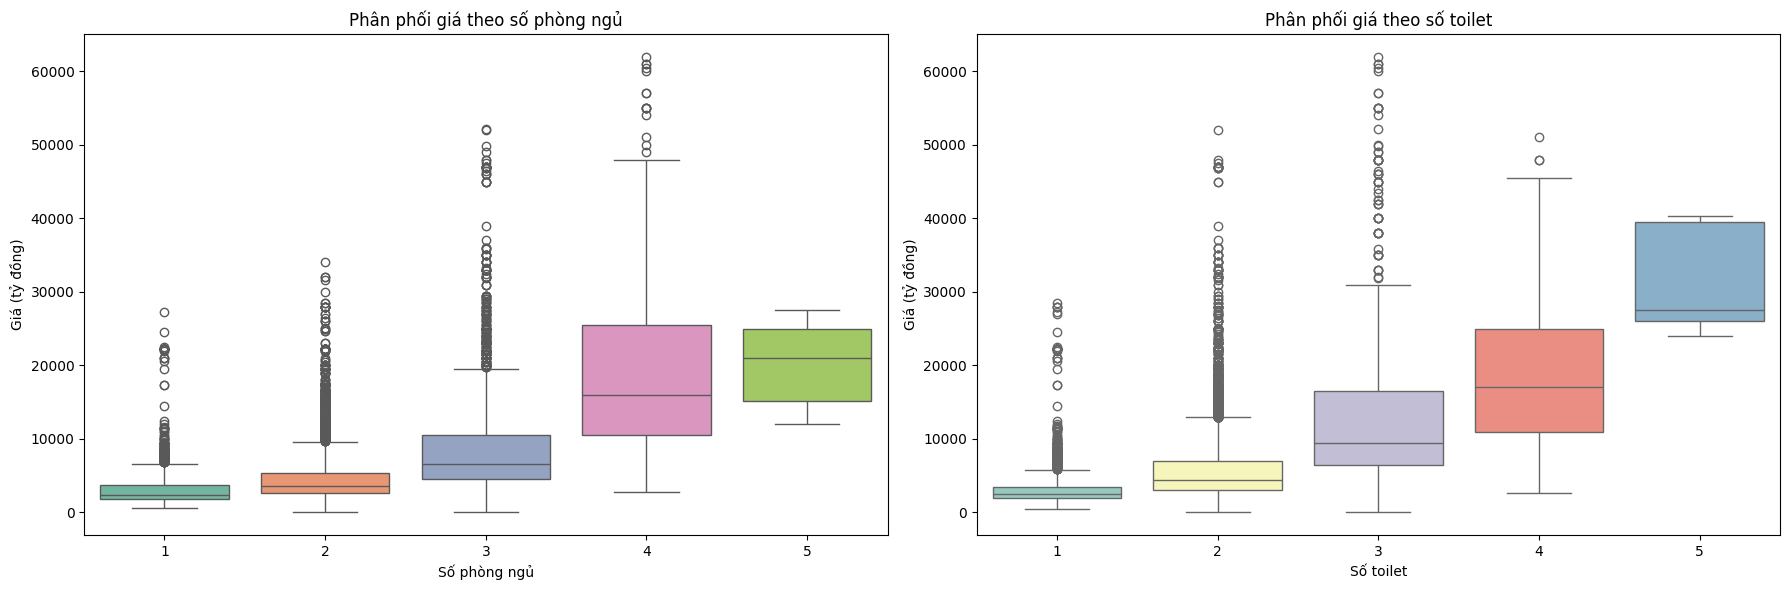

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df, x='Số phòng ngủ', y='Mức giá', palette='Set2', ax=axes[0])
axes[0].set_title('Phân phối giá theo số phòng ngủ')
axes[0].set_xlabel('Số phòng ngủ')
axes[0].set_ylabel('Giá (tỷ đồng)')

sns.boxplot(data=df, x='Số toilet', y='Mức giá', palette='Set3', ax=axes[1])
axes[1].set_title('Phân phối giá theo số toilet')
axes[1].set_xlabel('Số toilet')
axes[1].set_ylabel('Giá (tỷ đồng)')

plt.tight_layout()
plt.show()


Con đường nào có giá chung cư cao

In [15]:
X = df[["Giá/m²", "Số phòng ngủ", "Diện tích (m2)", "Số toilet", "Huyện"]]
y = df["Mức giá"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), ["Huyện"]),
        ("num", StandardScaler(), ["Giá/m²", "Số phòng ngủ", "Diện tích (m2)", "Số toilet"])
    ]
)
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

pipeline.fit(X_train, y_train)

pipeline.fit(X_train, y_train)

y_val_pred = pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation R²: {val_r2}")

y_test_pred = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Validation MSE: 3135178.502657745
Validation RMSE: 1770.643527833241
Validation R²: 0.9144087144736716
Test MSE: 3024200.3174654176
Test RMSE: 1739.0228053321835
Test R²: 0.9088295449723248


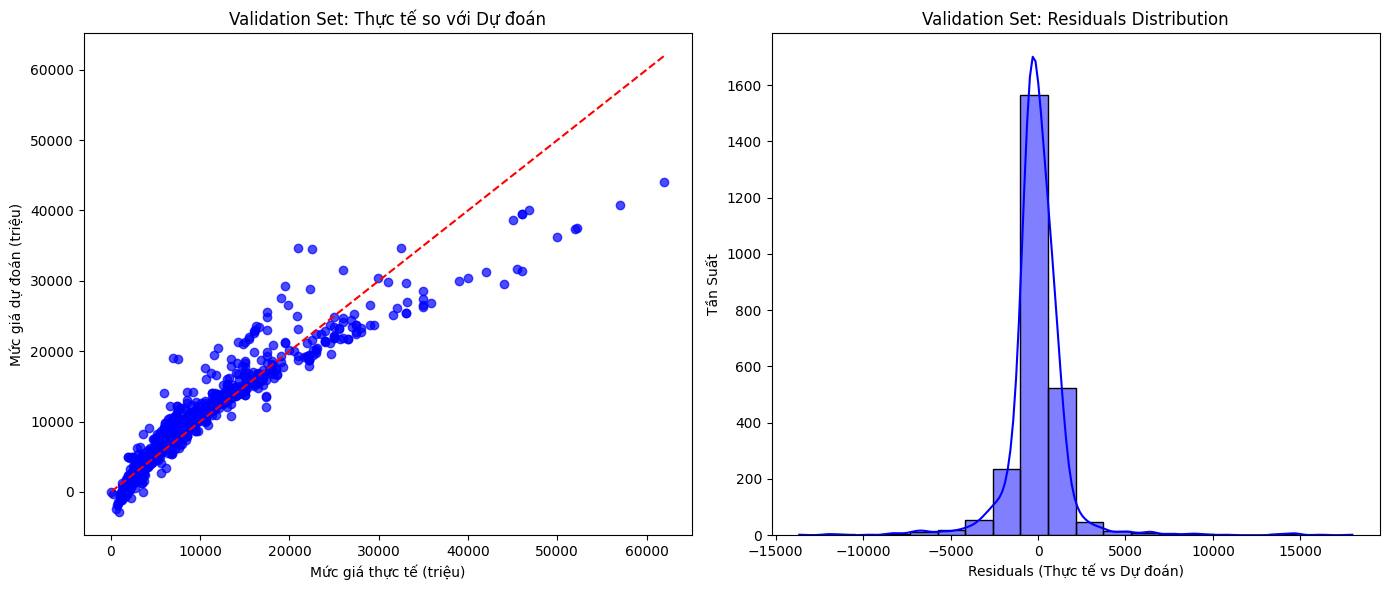

In [16]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.7, color="blue")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color="red", linestyle="--")
plt.title("Validation Set: Thực tế so với Dự đoán")
plt.xlabel("Mức giá thực tế (triệu)")
plt.ylabel("Mức giá dự đoán (triệu)")

plt.subplot(1, 2, 2)
residuals_val = y_val - y_val_pred
sns.histplot(residuals_val, kde=True, color="blue", bins=20)
plt.title("Validation Set: Residuals Distribution")
plt.xlabel("Residuals (Thực tế vs Dự đoán)")
plt.ylabel("Tần Suất")

plt.tight_layout()
plt.show()


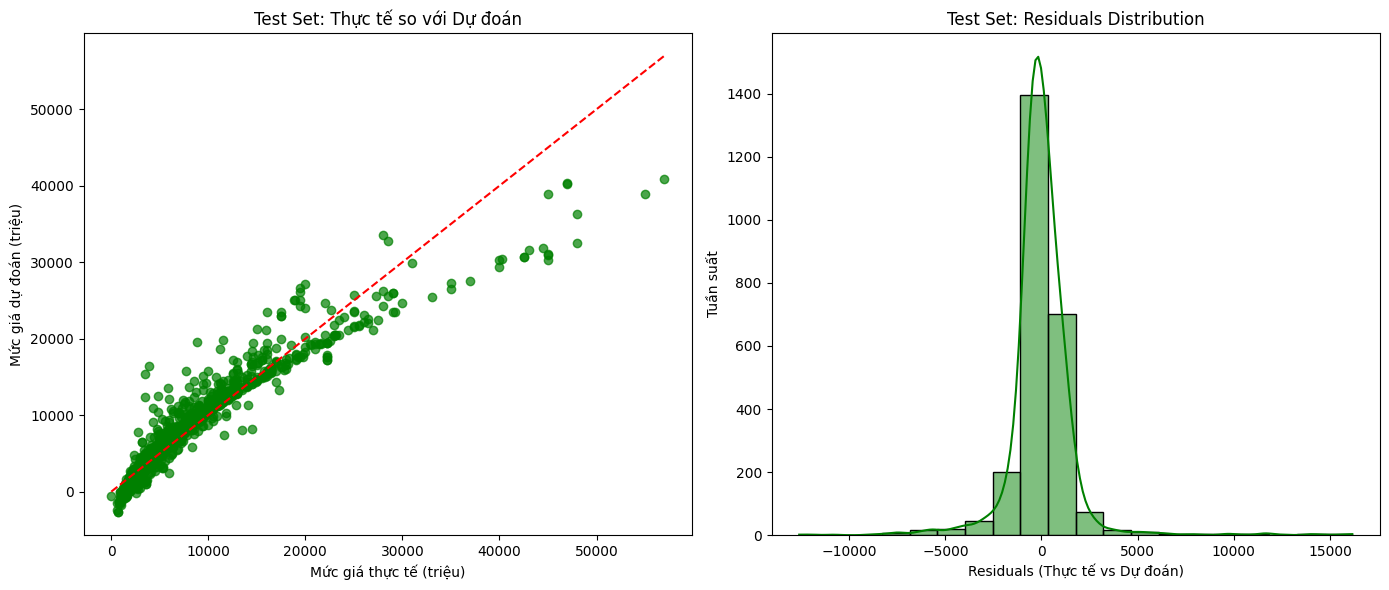

In [17]:
plt.figure(figsize=(14, 6))

# Scatter Plot for Test Set
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Test Set: Thực tế so với Dự đoán")
plt.xlabel("Mức giá thực tế (triệu)")
plt.ylabel("Mức giá dự đoán (triệu)")

# Residual Plot for Test Set
plt.subplot(1, 2, 2)
residuals_test = y_test - y_test_pred
sns.histplot(residuals_test, kde=True, color="green", bins=20)
plt.title("Test Set: Residuals Distribution")
plt.xlabel("Residuals (Thực tế vs Dự đoán)")
plt.ylabel("Tuần suất")

plt.tight_layout()
plt.show()
